In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [ ]:
dataFrame= pd.read_csv("/gdrive/MyDrive/Calisma_ortami/Belge.csv")

# LabelEncoder Kategorik Veriyi Numerik Veriye Dönüştürme

`df.apply(preprocessing.LabelEncoder().fit_transform)`




In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelEncoding= LabelEncoder()

In [ ]:
windy = dataFrame.iloc[:,3:4].values

In [ ]:
dataFrame["windy"] =labelEncoding.fit_transform(windy)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
play= dataFrame.iloc[:,-1].values

In [ ]:
dataFrame["play"]= labelEncoding.fit_transform(play)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
oneHotEncoding= OneHotEncoder()

In [ ]:
outlook= dataFrame.iloc[:, 0:1].values

In [ ]:
outlook= oneHotEncoding.fit_transform(outlook).toarray()

# OneHotEncoder Kategorik Veriyi Numerik Veriye Dönüştürme

`pd.get_dummies(DF["-"], prefix="-")` bu şekilde ifade edilebilir.





In [ ]:
dataFrame = pd.concat([dataFrame, pd.get_dummies(dataFrame["outlook"], prefix="outlook")], axis=1).drop("outlook", axis=1)

In [ ]:
dataFrame

,temperature,humidity,windy,play,outlook_overcast,outlook_rainy,outlook_sunny
0,85,85,0,0,0,0,1
1,80,90,1,0,0,0,1
2,83,86,0,1,1,0,0
3,70,96,0,1,0,1,0
4,68,80,0,1,0,1,0
5,65,70,1,0,0,1,0
6,64,65,1,1,1,0,0
7,72,95,0,0,0,0,1
8,69,70,0,1,0,0,1
9,75,80,0,1,0,1,0


<Axes: >

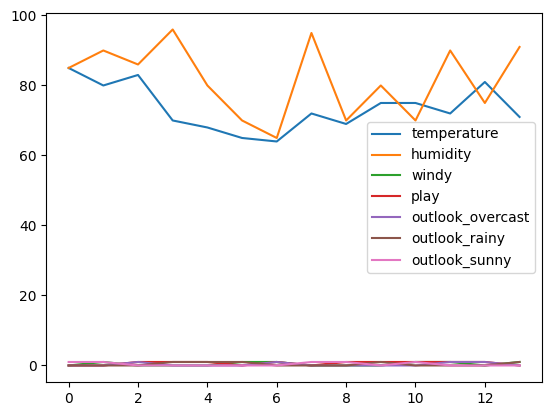

In [ ]:
dataFrame.plot()

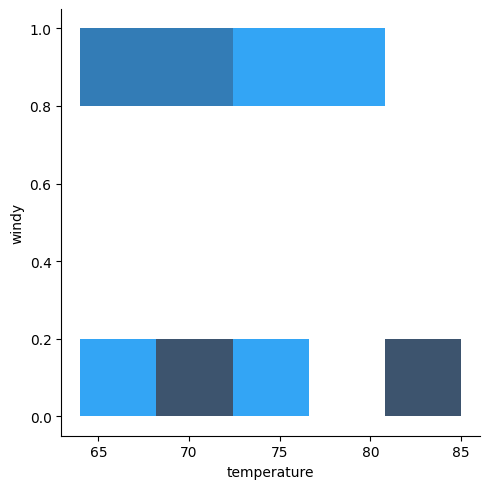

In [ ]:
sbn.displot(x=  "temperature", y="windy", data=dataFrame)

In [ ]:
dataFrame.isnull()

,temperature,humidity,windy,play,outlook_overcast,outlook_rainy,outlook_sunny
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [ ]:
 dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   temperature       14 non-null     int64
 1   humidity          14 non-null     int64
 2   windy             14 non-null     int64
 3   play              14 non-null     int64
 4   outlook_overcast  14 non-null     uint8
 5   outlook_rainy     14 non-null     uint8
 6   outlook_sunny     14 non-null     uint8
dtypes: int64(4), uint8(3)
memory usage: 618.0 bytes


In [ ]:
dataFrame.corr()

,temperature,humidity,windy,play,outlook_overcast,outlook_rainy,outlook_sunny
temperature,1.000000,0.315082,-0.328866,-0.121064,0.142675,-0.443901,0.309386
humidity,0.315082,1.000000,-0.201805,-0.342717,-0.168649,0.132145,0.026859
windy,-0.328866,-0.201805,1.000000,-0.258199,0.091287,-0.043033,-0.043033
play,-0.121064,-0.342717,-0.258199,1.000000,0.471405,-0.066667,-0.377778
outlook_overcast,0.142675,-0.168649,0.091287,0.471405,1.000000,-0.471405,-0.471405
outlook_rainy,-0.443901,0.132145,-0.043033,-0.066667,-0.471405,1.000000,-0.555556
outlook_sunny,0.309386,0.026859,-0.043033,-0.377778,-0.471405,-0.555556,1.000000


In [ ]:
dataFrame.mean()

temperature         73.571429
humidity            81.642857
windy                0.428571
play                 0.642857
outlook_overcast     0.285714
outlook_rainy        0.357143
outlook_sunny        0.357143
dtype: float64

In [ ]:
x= dataFrame.drop("play", axis=1).values
y= dataFrame["play"].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()

In [ ]:
regression= regression.fit(x_train, y_train)

In [ ]:
y_test_predict= regression.predict(x_test)

In [ ]:
print(y_test_predict)

[0.74233631 0.75371988 0.78998557 0.27181229 0.78572451]


In [ ]:
 print(y_test)

[1 1 1 1 1]


# Bacward Elemination

In [ ]:
import statsmodels.api as sm

In [ ]:
x=np.append(arr= np.ones((14,1)).astype(int), values=x, axis=1)
x

array([[ 1, 85, 85,  0,  0,  0,  1],
       [ 1, 80, 90,  1,  0,  0,  1],
       [ 1, 83, 86,  0,  1,  0,  0],
       [ 1, 70, 96,  0,  0,  1,  0],
       [ 1, 68, 80,  0,  0,  1,  0],
       [ 1, 65, 70,  1,  0,  1,  0],
       [ 1, 64, 65,  1,  1,  0,  0],
       [ 1, 72, 95,  0,  0,  0,  1],
       [ 1, 69, 70,  0,  0,  0,  1],
       [ 1, 75, 80,  0,  0,  1,  0],
       [ 1, 75, 70,  1,  0,  0,  1],
       [ 1, 72, 90,  1,  1,  0,  0],
       [ 1, 81, 75,  0,  1,  0,  0],
       [ 1, 71, 91,  1,  0,  1,  0]])

In [ ]:
X= x[:, [0,1,2,3,4,5]]

In [ ]:
model= sm.OLS(y,X).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     1.493
Date:                Thu, 14 Dec 2023   Prob (F-statistic):              0.292
Time:                        17:36:03   Log-Likelihood:                -4.9501
No. Observations:                  14   AIC:                             21.90
Df Residuals:                       8   BIC:                             25.73
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8194      1.878      1.501      0.1

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
   X= x[:, [0,1,2,3,5]]

In [ ]:
model =sm.OLS(y,X).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                 -0.078
Method:                 Least Squares   F-statistic:                    0.7637
Date:                Thu, 14 Dec 2023   Prob (F-statistic):              0.575
Time:                        17:36:04   Log-Likelihood:                -7.5192
No. Observations:                  14   AIC:                             25.04
Df Residuals:                       9   BIC:                             28.23
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3262      2.106      1.580      0.1

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
X= x[:, [0,1,4,5]]

In [ ]:
model= sm.OLS(y,X).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.229
Date:                Thu, 14 Dec 2023   Prob (F-statistic):              0.350
Time:                        17:36:04   Log-Likelihood:                -7.3683
No. Observations:                  14   AIC:                             22.74
Df Residuals:                      10   BIC:                             25.29
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2172      1.759      0.692      0.5

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [39]:
!git add LinearRegession_havaDurumuTahmini/LinearRegession_havaDurumuTahmin.ipynb


fatal: pathspec 'LinearRegession_havaDurumuTahmini/LinearRegession_havaDurumuTahmin.ipynb' did not match any files
